# Import Packages

In [118]:
# common package
import numpy as np
from matplotlib import pyplot as plt

# sklearn package
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Load Data

In [2]:
raw_data = np.load('data_1000/raw_data.npz')
x_train = raw_data['X_train']
y_train = raw_data['y_train']
x_test = raw_data['X_test']
y_test = raw_data['y_test']

In [3]:
x_train.shape, x_test.shape

((902, 2048), (226, 2048))

In [4]:
y_train.shape, y_test.shape

((902,), (226,))

In [5]:
y_max, y_min = max(max(y_train),max(y_test)), min(min(y_train),min(y_test))
y_range = np.linspace(y_min,y_max,100)

# OLS with Regulization

In [6]:
def training(alpha):
   # Train the model using the training sets
    lin_reg = linear_model.Ridge(alpha=alpha)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Alpha = {:.2f}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(alpha,mse,mse_train,r2,r2_train))

for alpha in np.linspace(0.1,10,20):
    training(alpha)

Alpha = 0.10	|	MSE = 2.328 (train = 0.077)	|	r2_score = 0.552 (train = 0.982)
Alpha = 0.62	|	MSE = 1.888 (train = 0.131)	|	r2_score = 0.637 (train = 0.969)
Alpha = 1.14	|	MSE = 1.784 (train = 0.177)	|	r2_score = 0.657 (train = 0.958)
Alpha = 1.66	|	MSE = 1.737 (train = 0.217)	|	r2_score = 0.666 (train = 0.948)
Alpha = 2.18	|	MSE = 1.712 (train = 0.252)	|	r2_score = 0.671 (train = 0.940)
Alpha = 2.71	|	MSE = 1.699 (train = 0.284)	|	r2_score = 0.673 (train = 0.932)
Alpha = 3.23	|	MSE = 1.693 (train = 0.313)	|	r2_score = 0.674 (train = 0.925)
Alpha = 3.75	|	MSE = 1.691 (train = 0.341)	|	r2_score = 0.675 (train = 0.919)
Alpha = 4.27	|	MSE = 1.691 (train = 0.366)	|	r2_score = 0.675 (train = 0.913)
Alpha = 4.79	|	MSE = 1.694 (train = 0.390)	|	r2_score = 0.674 (train = 0.907)
Alpha = 5.31	|	MSE = 1.698 (train = 0.412)	|	r2_score = 0.673 (train = 0.902)
Alpha = 5.83	|	MSE = 1.703 (train = 0.433)	|	r2_score = 0.673 (train = 0.896)
Alpha = 6.35	|	MSE = 1.708 (train = 0.453)	|	r2_score = 0.671 (t

In [18]:
# Train the model using the training sets
lin_reg = linear_model.Ridge(alpha=4)
lin_reg.fit(x_train,y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Mean squared error: 1.69
Variance score (r2_score): 0.67


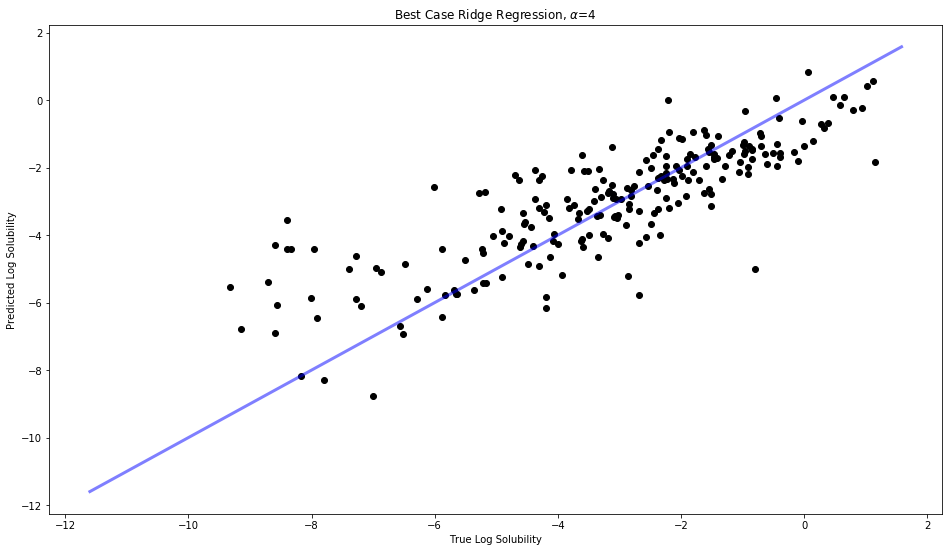

In [19]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

# The mean squared error
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)
))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2_score): {:.2f}'.format(r2_score(y_test, y_pred)))

# Plot outputs
fig, axs = plt.subplots(figsize=(16,9))

plt.scatter(y_test, y_pred,c='k')
axs.plot(y_range, y_range, c='b', linewidth=3,alpha=0.5)
axs.set_title(r'Best Case Ridge Regression, $\alpha$={}'.format(lin_reg.alpha))
axs.set_xlabel('True Log Solubility')
axs.set_ylabel('Predicted Log Solubility')
plt.show()

# Lasso

In [37]:
def training(alpha):
   # Train the model using the training sets
    lin_reg = linear_model.Lasso(alpha=alpha,max_iter=10000)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Alpha = {:.5f}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(alpha,mse,mse_train,r2,r2_train))

for alpha in np.linspace(0.0001,0.1,20):
    training(alpha)

Alpha = 0.00010	|	MSE = 2.668 (train = 0.082)	|	r2_score = 0.487 (train = 0.980)
Alpha = 0.00536	|	MSE = 1.917 (train = 0.937)	|	r2_score = 0.631 (train = 0.776)
Alpha = 0.01062	|	MSE = 2.168 (train = 1.257)	|	r2_score = 0.583 (train = 0.699)
Alpha = 0.01587	|	MSE = 2.350 (train = 1.474)	|	r2_score = 0.548 (train = 0.648)
Alpha = 0.02113	|	MSE = 2.513 (train = 1.613)	|	r2_score = 0.517 (train = 0.614)
Alpha = 0.02639	|	MSE = 2.687 (train = 1.758)	|	r2_score = 0.483 (train = 0.580)
Alpha = 0.03165	|	MSE = 2.865 (train = 1.901)	|	r2_score = 0.449 (train = 0.546)
Alpha = 0.03691	|	MSE = 3.025 (train = 2.048)	|	r2_score = 0.418 (train = 0.511)
Alpha = 0.04216	|	MSE = 3.155 (train = 2.188)	|	r2_score = 0.393 (train = 0.477)
Alpha = 0.04742	|	MSE = 3.282 (train = 2.317)	|	r2_score = 0.369 (train = 0.446)
Alpha = 0.05268	|	MSE = 3.393 (train = 2.421)	|	r2_score = 0.347 (train = 0.421)
Alpha = 0.05794	|	MSE = 3.500 (train = 2.518)	|	r2_score = 0.327 (train = 0.398)
Alpha = 0.06319	|	MSE = 3.61

In [38]:
# Train the model using the training sets
lin_reg = linear_model.Lasso(alpha=0.005)
lin_reg.fit(x_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Mean squared error: 1.89
Variance score (r2_score): 0.64


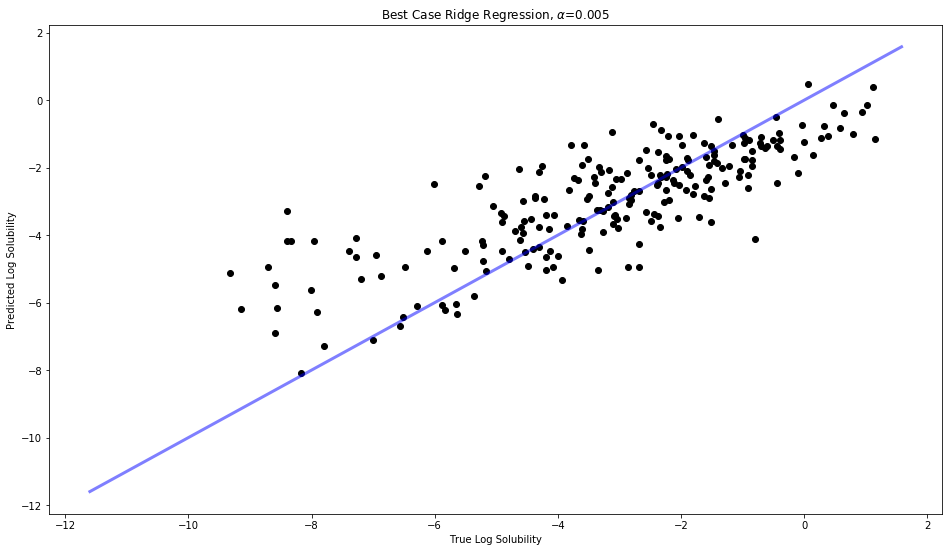

In [39]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

# The mean squared error
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)
))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2_score): {:.2f}'.format(r2_score(y_test, y_pred)))

# Plot outputs
fig, axs = plt.subplots(figsize=(16,9))

plt.scatter(y_test, y_pred,c='k')
axs.plot(y_range, y_range, c='b', linewidth=3,alpha=0.5)
axs.set_title(r'Best Case Lasso Regression, $\alpha$={}'.format(lin_reg.alpha))
axs.set_xlabel('True Log Solubility')
axs.set_ylabel('Predicted Log Solubility')
plt.show()

# SVM - 'rbf'

In [48]:
def training(C):
   # Train the model using the training sets
    lin_reg = svm.SVR(C=C)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Penalty Cost = {:.2f}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(C,mse,mse_train,r2,r2_train))

for C in np.linspace(10,250,25):
    training(C)

Penalty Cost = 10.00	|	MSE = 3.106 (train = 1.989)	|	r2_score = 0.402 (train = 0.525)
Penalty Cost = 20.00	|	MSE = 2.544 (train = 1.453)	|	r2_score = 0.511 (train = 0.653)
Penalty Cost = 30.00	|	MSE = 2.282 (train = 1.196)	|	r2_score = 0.561 (train = 0.714)
Penalty Cost = 40.00	|	MSE = 2.157 (train = 1.041)	|	r2_score = 0.585 (train = 0.751)
Penalty Cost = 50.00	|	MSE = 2.067 (train = 0.936)	|	r2_score = 0.602 (train = 0.776)
Penalty Cost = 60.00	|	MSE = 2.004 (train = 0.853)	|	r2_score = 0.615 (train = 0.796)
Penalty Cost = 70.00	|	MSE = 1.964 (train = 0.788)	|	r2_score = 0.622 (train = 0.812)
Penalty Cost = 80.00	|	MSE = 1.938 (train = 0.734)	|	r2_score = 0.627 (train = 0.825)
Penalty Cost = 90.00	|	MSE = 1.922 (train = 0.691)	|	r2_score = 0.630 (train = 0.835)
Penalty Cost = 100.00	|	MSE = 1.905 (train = 0.654)	|	r2_score = 0.633 (train = 0.844)
Penalty Cost = 110.00	|	MSE = 1.894 (train = 0.621)	|	r2_score = 0.636 (train = 0.852)
Penalty Cost = 120.00	|	MSE = 1.886 (train = 0.592)	

# SVM - 'sigmoid'

In [50]:
def training(C):
   # Train the model using the training sets
    lin_reg = svm.SVR(kernel='sigmoid',C=C)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Penalty Cost = {:.2f}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(C,mse,mse_train,r2,r2_train))

for C in np.linspace(10,500,21):
    training(C)

Penalty Cost = 10.00	|	MSE = 3.703 (train = 2.575)	|	r2_score = 0.288 (train = 0.385)
Penalty Cost = 34.50	|	MSE = 2.669 (train = 1.566)	|	r2_score = 0.487 (train = 0.626)
Penalty Cost = 59.00	|	MSE = 2.300 (train = 1.212)	|	r2_score = 0.558 (train = 0.710)
Penalty Cost = 83.50	|	MSE = 2.147 (train = 1.023)	|	r2_score = 0.587 (train = 0.755)
Penalty Cost = 108.00	|	MSE = 2.051 (train = 0.905)	|	r2_score = 0.605 (train = 0.784)
Penalty Cost = 132.50	|	MSE = 1.987 (train = 0.815)	|	r2_score = 0.618 (train = 0.805)
Penalty Cost = 157.00	|	MSE = 1.958 (train = 0.748)	|	r2_score = 0.623 (train = 0.821)
Penalty Cost = 181.50	|	MSE = 1.938 (train = 0.694)	|	r2_score = 0.627 (train = 0.834)
Penalty Cost = 206.00	|	MSE = 1.920 (train = 0.650)	|	r2_score = 0.631 (train = 0.845)
Penalty Cost = 230.50	|	MSE = 1.910 (train = 0.613)	|	r2_score = 0.633 (train = 0.854)
Penalty Cost = 255.00	|	MSE = 1.898 (train = 0.577)	|	r2_score = 0.635 (train = 0.862)
Penalty Cost = 279.50	|	MSE = 1.886 (train = 0.

# Nearest Neighbors Regressor

In [79]:
def training(n):
   # Train the model using the training sets
    lin_reg = KNeighborsRegressor(n_neighbors=n)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Neighbors = {:}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(n,mse,mse_train,r2,r2_train))

for n in np.linspace(1,10,10).astype('int'):
    training(n)

Penalty Cost = 500.00	|	MSE = 2.444 (train = 0.095)	|	r2_score = 0.530 (train = 0.977)
Penalty Cost = 500.00	|	MSE = 2.082 (train = 0.744)	|	r2_score = 0.600 (train = 0.822)
Penalty Cost = 500.00	|	MSE = 2.258 (train = 1.060)	|	r2_score = 0.566 (train = 0.747)
Penalty Cost = 500.00	|	MSE = 2.301 (train = 1.203)	|	r2_score = 0.557 (train = 0.712)
Penalty Cost = 500.00	|	MSE = 2.248 (train = 1.344)	|	r2_score = 0.568 (train = 0.679)
Penalty Cost = 500.00	|	MSE = 2.335 (train = 1.503)	|	r2_score = 0.551 (train = 0.641)
Penalty Cost = 500.00	|	MSE = 2.351 (train = 1.639)	|	r2_score = 0.548 (train = 0.608)
Penalty Cost = 500.00	|	MSE = 2.551 (train = 1.703)	|	r2_score = 0.509 (train = 0.593)
Penalty Cost = 500.00	|	MSE = 2.578 (train = 1.795)	|	r2_score = 0.504 (train = 0.571)
Penalty Cost = 500.00	|	MSE = 2.704 (train = 1.882)	|	r2_score = 0.480 (train = 0.550)


# Decision Tree Regressor

In [84]:
def training():
   # Train the model using the training sets
    lin_reg = tree.DecisionTreeRegressor()
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Neighbors = {:}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(n,mse,mse_train,r2,r2_train))

training()

Neighbors = 1.0	|	MSE = 2.291 (train = 0.053)	|	r2_score = 0.559 (train = 0.987)


# Random Forest Regressor

In [91]:
def training(n):
   # Train the model using the training sets
    lin_reg = RandomForestRegressor(n_estimators=n)
    lin_reg.fit(x_train,y_train)
    # Make predictions using the testing set
    y_pred = lin_reg.predict(x_test)
    y_pred_train = lin_reg.predict(x_train)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    # Explained variance score: 1 is perfect prediction
    r2 = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    print('Estimators = {:4s}\t|\tMSE = {:.3f} (train = {:.3f})\t|\tr2_score = {:.3f} (train = {:.3f})'
          .format(str(n),mse,mse_train,r2,r2_train))

for n in np.linspace(10,200,10).astype('int'):
    training(n)

Estimators = 10  	|	MSE = 1.574 (train = 0.305)	|	r2_score = 0.697 (train = 0.927)
Estimators = 31  	|	MSE = 1.498 (train = 0.252)	|	r2_score = 0.712 (train = 0.940)
Estimators = 52  	|	MSE = 1.515 (train = 0.236)	|	r2_score = 0.709 (train = 0.943)
Estimators = 73  	|	MSE = 1.552 (train = 0.234)	|	r2_score = 0.701 (train = 0.944)
Estimators = 94  	|	MSE = 1.549 (train = 0.230)	|	r2_score = 0.702 (train = 0.945)
Estimators = 115 	|	MSE = 1.546 (train = 0.228)	|	r2_score = 0.703 (train = 0.946)
Estimators = 136 	|	MSE = 1.536 (train = 0.229)	|	r2_score = 0.705 (train = 0.945)
Estimators = 157 	|	MSE = 1.528 (train = 0.227)	|	r2_score = 0.706 (train = 0.946)
Estimators = 178 	|	MSE = 1.503 (train = 0.229)	|	r2_score = 0.711 (train = 0.945)
Estimators = 200 	|	MSE = 1.512 (train = 0.226)	|	r2_score = 0.709 (train = 0.946)


In [92]:
lin_reg = RandomForestRegressor(n_estimators=50,n_jobs=-1)
lin_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Mean squared error: 1.55
Variance score (r2_score): 0.70


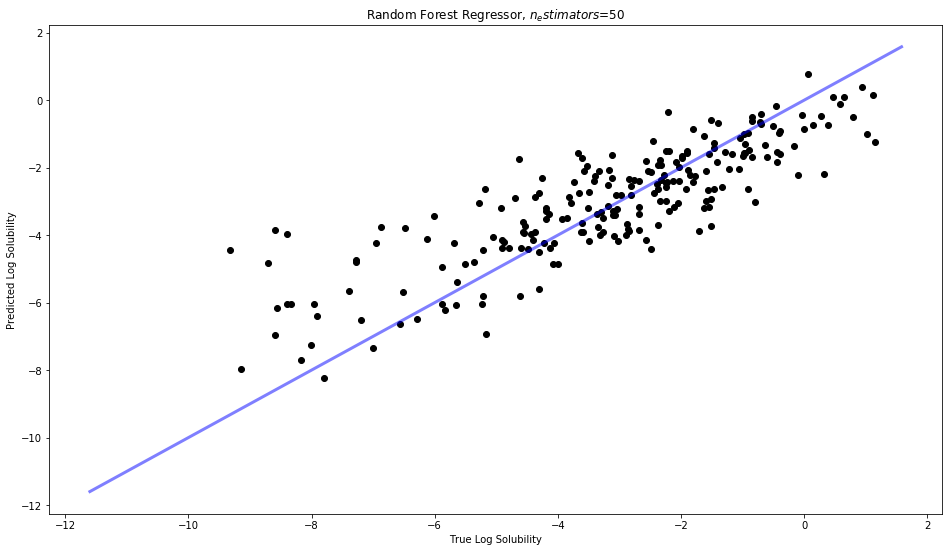

In [94]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

# The mean squared error
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)
))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2_score): {:.2f}'.format(r2_score(y_test, y_pred)))

# Plot outputs
fig, axs = plt.subplots(figsize=(16,9))

plt.scatter(y_test, y_pred,c='k')
axs.plot(y_range, y_range, c='b', linewidth=3,alpha=0.5)
axs.set_title(r'Random Forest Regressor, $n_estimators$={}'.format(lin_reg.n_estimators))
axs.set_xlabel('True Log Solubility')
axs.set_ylabel('Predicted Log Solubility')
plt.show()

# Adaboost Regressor

In [112]:
base = RandomForestRegressor(n_estimators=50,n_jobs=-1)
# Train the model using the training sets
lin_reg = AdaBoostRegressor(base_estimator=base,n_estimators=50,learning_rate=alpha,random_state=88)
lin_reg.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=50,
         random_state=88)

Mean squared error: 1.42
Variance score (r2_score): 0.73


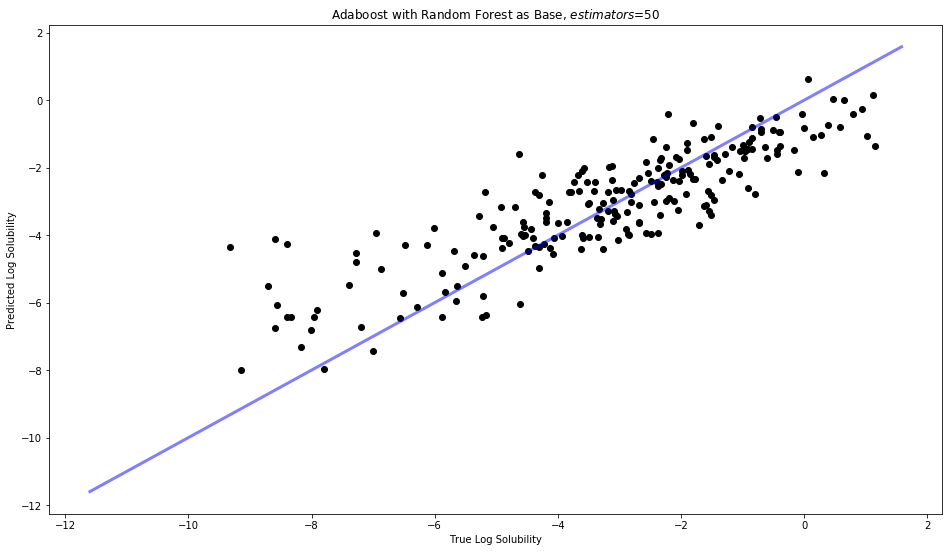

In [117]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

# The mean squared error
print("Mean squared error: {:.2f}".format(
    mean_squared_error(y_test, y_pred)
))
# Explained variance score: 1 is perfect prediction
print('Variance score (r2_score): {:.2f}'.format(r2_score(y_test, y_pred)))

# Plot outputs
fig, axs = plt.subplots(figsize=(16,9))

plt.scatter(y_test, y_pred,c='k')
axs.plot(y_range, y_range, c='b', linewidth=3,alpha=0.5)
axs.set_title(r'Adaboost with Random Forest as Base, $estimators$={}'.format(lin_reg.n_estimators))
axs.set_xlabel('True Log Solubility')
axs.set_ylabel('Predicted Log Solubility')
plt.show()